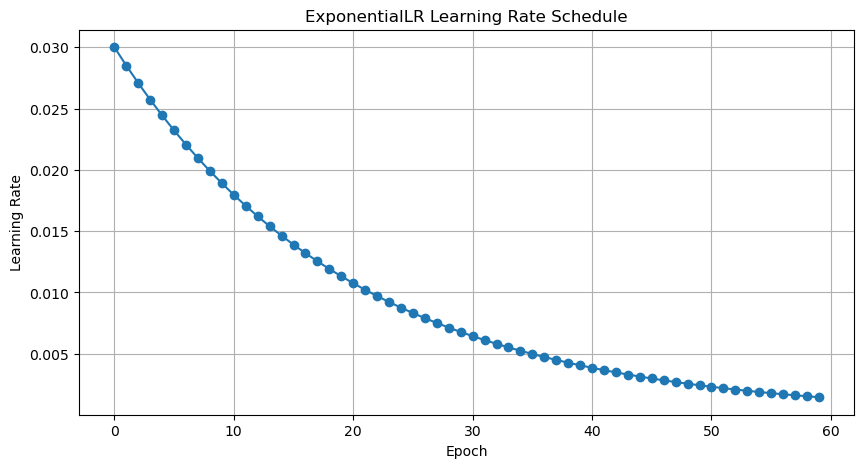

In [1]:
import torch
from torch.optim import AdamW
from torch.optim.lr_scheduler import ExponentialLR
import matplotlib.pyplot as plt

# Dummy model
model = torch.nn.Linear(10, 2)

# Initial learning rate and optimizer setup
initial_lr = 0.03
optimizer = AdamW(model.parameters(), lr=initial_lr)
scheduler = ExponentialLR(optimizer, gamma=0.95)

# Simulate and collect learning rates over 60 epochs
num_epochs = 60
exp_lr_rates = []

for epoch in range(num_epochs):
    exp_lr_rates.append(optimizer.param_groups[0]['lr'])
    optimizer.step()
    scheduler.step()

# Plot the learning rate schedule
plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs), exp_lr_rates, marker='o')
plt.title("ExponentialLR Learning Rate Schedule")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.grid(True)
plt.show()


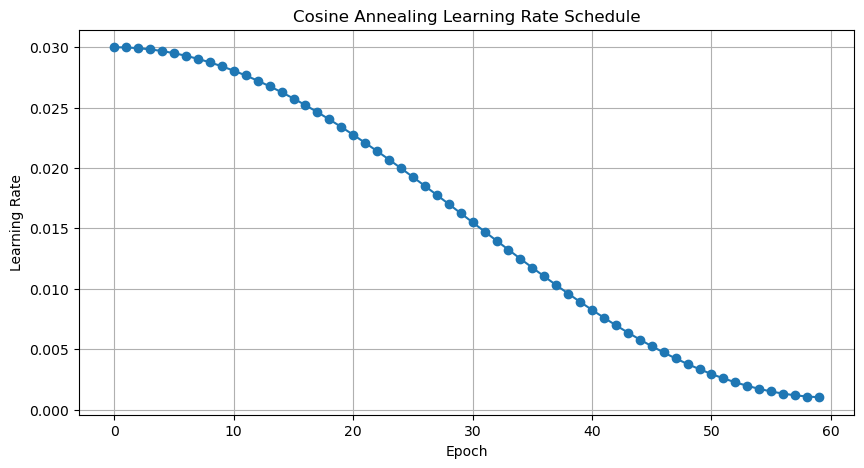

In [7]:
import torch
from torch.optim import AdamW
from torch.optim.lr_scheduler import CosineAnnealingLR
import matplotlib.pyplot as plt

# Dummy model for demonstration
model = torch.nn.Linear(10, 2)  # A simple linear layer as a dummy model

# Initial learning rate and optimizer setup
initial_lr = 0.03
optimizer = AdamW(model.parameters(), lr=initial_lr)

# Set up Cosine Annealing scheduler
scheduler = CosineAnnealingLR(optimizer, T_max=60, eta_min=0.001)  # T_max is the number of epochs until restart

# Simulate and collect learning rates over 60 epochs
num_epochs = 60
cosine_lr_rates = []

for epoch in range(num_epochs):
    cosine_lr_rates.append(optimizer.param_groups[0]['lr'])
    optimizer.step()
    scheduler.step()

# Plot the learning rate schedule
plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs), cosine_lr_rates, marker='o')
plt.title("Cosine Annealing Learning Rate Schedule")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.grid(True)
plt.show()


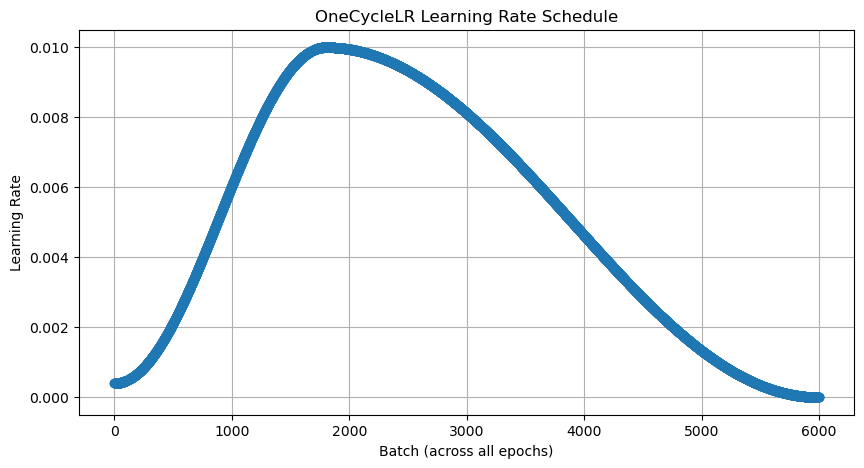

In [2]:
from torch.optim.lr_scheduler import OneCycleLR

# Assume a dummy data loader length
steps_per_epoch = 100  # This should be the length of your DataLoader

# Setup optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=0.001)
scheduler = OneCycleLR(optimizer, max_lr=0.01, steps_per_epoch=steps_per_epoch, epochs=num_epochs)

# Simulate and collect learning rates
one_cycle_lr_rates = []

for epoch in range(num_epochs):
    for _ in range(steps_per_epoch):
        optimizer.step()
        one_cycle_lr_rates.append(optimizer.param_groups[0]['lr'])
        scheduler.step()

# Plot the learning rate schedule
plt.figure(figsize=(10, 5))
plt.plot(range(len(one_cycle_lr_rates)), one_cycle_lr_rates, marker='o')
plt.title("OneCycleLR Learning Rate Schedule")
plt.xlabel("Batch (across all epochs)")
plt.ylabel("Learning Rate")
plt.grid(True)
plt.show()


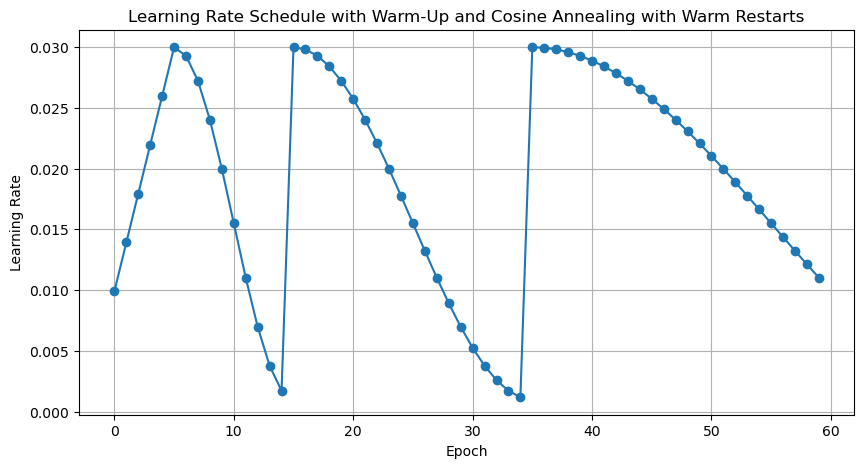

In [10]:
import torch
from torch.optim import AdamW
from torch.optim.lr_scheduler import LinearLR, CosineAnnealingWarmRestarts, SequentialLR
import matplotlib.pyplot as plt

# Dummy model
model = torch.nn.Linear(10, 2)  # A simple linear layer as a dummy model

# Initial learning rate and optimizer setup
initial_lr = 0.03
optimizer = AdamW(model.parameters(), lr=initial_lr)

# Warm-up phase for the first 10 epochs
warmup_scheduler = LinearLR(optimizer, start_factor=0.33, end_factor=1.0, total_iters=5)

# Cosine Annealing Warm Restarts phase after warm-up
cosine_scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=0.001)

# Combine warm-up and cosine annealing with SequentialLR
scheduler = SequentialLR(
    optimizer,
    schedulers=[warmup_scheduler, cosine_scheduler],
    milestones=[5]  # Start cosine annealing after the warm-up phase at epoch 10
)

# Simulate and collect learning rates over 60 epochs
num_epochs = 60
learning_rates = []

for epoch in range(num_epochs):
    # Record the current learning rate
    learning_rates.append(optimizer.param_groups[0]['lr'])
    
    # Step the scheduler
    scheduler.step()

# Plot the learning rate schedule
plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs), learning_rates, marker='o')
plt.title("Learning Rate Schedule with Warm-Up and Cosine Annealing with Warm Restarts")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.grid(True)
plt.show()


/home/sur06423/miniconda3/envs/deepl/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:224: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


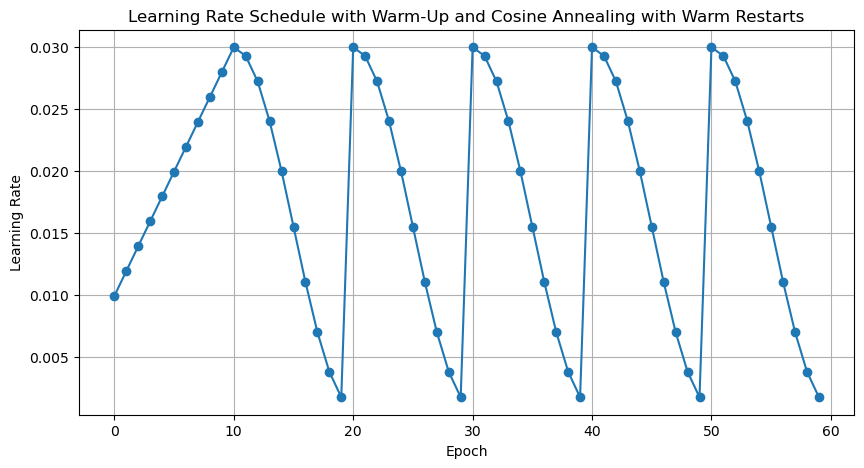

In [29]:
import torch
from torch.optim import AdamW
from torch.optim.lr_scheduler import LinearLR, CosineAnnealingWarmRestarts, SequentialLR
import matplotlib.pyplot as plt

# Dummy model
model = torch.nn.Linear(10, 2)  # A simple linear layer as a dummy model

# Initial learning rate and optimizer setup
initial_lr = 0.03
optimizer = AdamW(model.parameters(), lr=initial_lr)

# Warm-up phase for exactly the first 10 epochs
warmup_scheduler = LinearLR(optimizer, start_factor=0.33, end_factor=1.0, total_iters=10)

# Cosine Annealing Warm Restarts phase after warm-up
cosine_scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=1, eta_min=0.001)

# Combine warm-up and cosine annealing with SequentialLR
scheduler = SequentialLR(
    optimizer,
    schedulers=[warmup_scheduler, cosine_scheduler],
    milestones=[10]  # Start cosine annealing immediately after the warm-up phase at epoch 10
)

# Simulate and collect learning rates over 60 epochs
num_epochs = 60
learning_rates = []

for epoch in range(num_epochs):
    # Record the current learning rate
    learning_rates.append(optimizer.param_groups[0]['lr'])
    
    # Step the scheduler
    scheduler.step()

# Plot the learning rate schedule
plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs), learning_rates, marker='o')
plt.title("Learning Rate Schedule with Warm-Up and Cosine Annealing with Warm Restarts")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.grid(True)
plt.show()


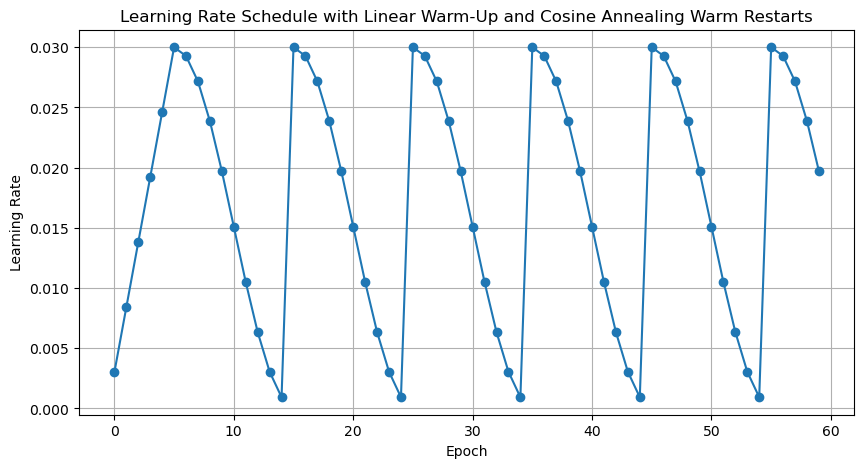

In [3]:
import torch
from torch.optim import AdamW
from torch.optim.lr_scheduler import LinearLR, CosineAnnealingWarmRestarts, SequentialLR
import matplotlib.pyplot as plt

# Dummy model
model = torch.nn.Linear(10, 2)  # A simple linear layer as a dummy model

# Initial learning rate and optimizer setup
initial_lr = 0.03
optimizer = AdamW(model.parameters(), lr=initial_lr)

# Warm-up phase for the first 5 epochs
warmup_scheduler = LinearLR(optimizer, start_factor=0.1, end_factor=1.0, total_iters=5)

# Cosine Annealing Warm Restarts phase after warm-up with restart learning rate of 0.01
cosine_scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=1, eta_min=0.0002)

# Combine both using SequentialLR
scheduler = SequentialLR(optimizer, schedulers=[warmup_scheduler, cosine_scheduler], milestones=[5])

# Simulate and collect learning rates over 60 epochs
num_epochs = 60
learning_rates = []

for epoch in range(num_epochs):
    # Record the current learning rate
    learning_rates.append(optimizer.param_groups[0]['lr'])
    
    # Step the scheduler
    scheduler.step()

# Plot the learning rate schedule
plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs), learning_rates, marker='o')
plt.title("Learning Rate Schedule with Linear Warm-Up and Cosine Annealing Warm Restarts")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.grid(True)
plt.show()


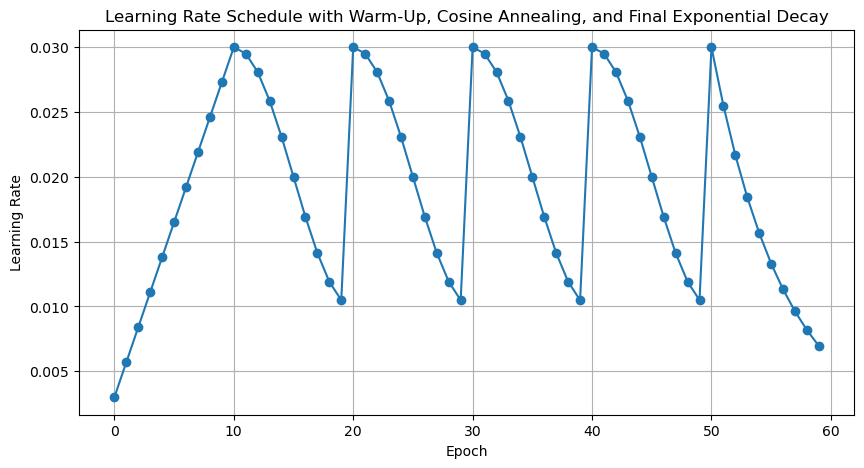

In [13]:
import torch
from torch.optim import AdamW
from torch.optim.lr_scheduler import LinearLR, CosineAnnealingWarmRestarts, ExponentialLR, SequentialLR
import matplotlib.pyplot as plt

# Dummy model
model = torch.nn.Linear(10, 2)  # A simple linear layer as a dummy model

# Initial learning rate and optimizer setup
initial_lr = 0.03
optimizer = AdamW(model.parameters(), lr=initial_lr)

# Warm-up phase for the first 5 epochs
warmup_scheduler = LinearLR(optimizer, start_factor=0.1, end_factor=1.0, total_iters=10)

# Cosine Annealing Warm Restarts phase after warm-up
cosine_scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=1, eta_min=0.01)

# Placeholder final learning rate to dynamically adjust ExponentialLR starting point
final_lr_start = optimizer.param_groups[0]['lr']

# Final Exponential Decay phase
# Exponential decay with a decay rate to bring the learning rate very low over 10 epochs
final_decay_scheduler = ExponentialLR(optimizer, gamma=0.85)

# Combine all three using SequentialLR
scheduler = SequentialLR(
    optimizer,
    schedulers=[warmup_scheduler, cosine_scheduler, final_decay_scheduler],
    milestones=[10, 50]  # Start final decay after 50 epochs
)

# Simulate and collect learning rates over 60 epochs
num_epochs = 60
learning_rates = []

for epoch in range(num_epochs):
    # Record the current learning rate
    learning_rates.append(optimizer.param_groups[0]['lr'])
    
    # Step the scheduler
    scheduler.step()

# Plot the learning rate schedule
plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs), learning_rates, marker='o')
plt.title("Learning Rate Schedule with Warm-Up, Cosine Annealing, and Final Exponential Decay")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.grid(True)
plt.show()


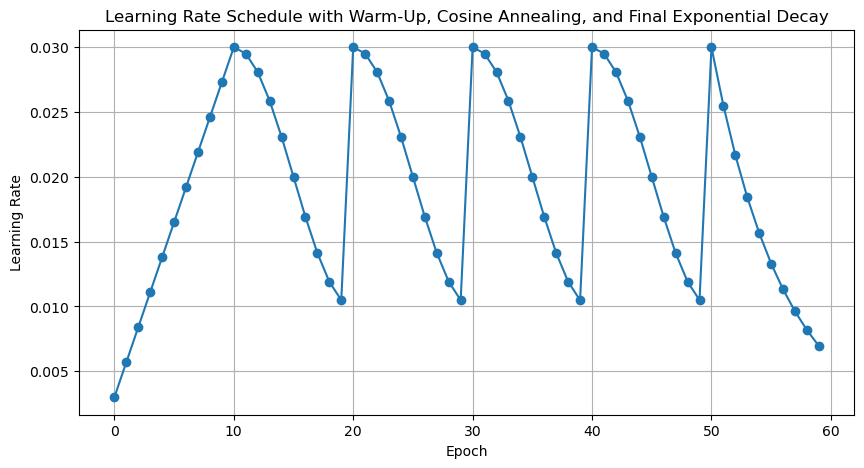

In [11]:
import torch
from torch.optim import AdamW
from torch.optim.lr_scheduler import LinearLR, CosineAnnealingWarmRestarts, ExponentialLR, SequentialLR
import matplotlib.pyplot as plt

# Dummy model
model = torch.nn.Linear(10, 2)  # A simple linear layer as a dummy model

# Initial learning rate and optimizer setup
initial_lr = 0.03
optimizer = AdamW(model.parameters(), lr=initial_lr)

# Warm-up phase for the first 10 epochs
warmup_scheduler = LinearLR(optimizer, start_factor=0.1, end_factor=1.0, total_iters=10)

# Cosine Annealing Warm Restarts phase after warm-up
cosine_scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=1, eta_min=0.01)

# Custom scheduler class to delay ExponentialLR creation until after the cosine phase
class DynamicExponentialLR(torch.optim.lr_scheduler._LRScheduler):
    def __init__(self, optimizer, gamma=0.85, last_epoch=-1):
        self.gamma = gamma
        self.scheduler = None  # Placeholder for the actual ExponentialLR scheduler
        super().__init__(optimizer, last_epoch)
    
    def step(self, epoch=None):
        # Create ExponentialLR scheduler if it hasn't been created yet
        if self.scheduler is None:
            last_lr = self.optimizer.param_groups[0]['lr']  # Get last LR from the optimizer
            self.scheduler = ExponentialLR(self.optimizer, gamma=self.gamma)
            # Set the optimizer's learning rate to start from the last learning rate of cosine scheduler
            for param_group in self.optimizer.param_groups:
                param_group['lr'] = last_lr
        # Step the ExponentialLR scheduler
        if epoch is not None:
            self.scheduler.step(epoch)
        else:
            self.scheduler.step()

    def get_last_lr(self):
        return self.scheduler.get_last_lr() if self.scheduler else [self.optimizer.param_groups[0]['lr']]

# Combine all three using SequentialLR with custom exponential decay
scheduler = SequentialLR(
    optimizer,
    schedulers=[warmup_scheduler, cosine_scheduler, DynamicExponentialLR(optimizer, gamma=0.85)],
    milestones=[10, 50]  # Start final decay after 50 epochs
)

# Simulate and collect learning rates over 60 epochs
num_epochs = 60
learning_rates = []

for epoch in range(num_epochs):
    # Record the current learning rate
    learning_rates.append(optimizer.param_groups[0]['lr'])
    
    # Step the scheduler
    scheduler.step()

# Plot the learning rate schedule
plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs), learning_rates, marker='o')
plt.title("Learning Rate Schedule with Warm-Up, Cosine Annealing, and Final Exponential Decay")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.grid(True)
plt.show()


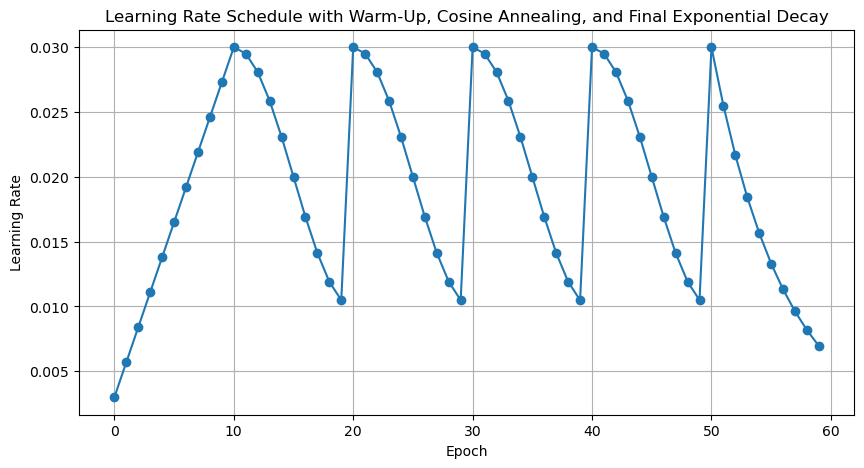

In [17]:
import torch
from torch.optim import AdamW
from torch.optim.lr_scheduler import LinearLR, CosineAnnealingWarmRestarts, ExponentialLR, SequentialLR
import matplotlib.pyplot as plt

# Dummy model
model = torch.nn.Linear(10, 2)  # A simple linear layer as a dummy model

# Initial learning rate and optimizer setup
initial_lr = 0.03
optimizer = AdamW(model.parameters(), lr=initial_lr)

# Warm-up phase for the first 10 epochs
warmup_scheduler = LinearLR(optimizer, start_factor=0.1, end_factor=1.0, total_iters=10)

# Cosine Annealing Warm Restarts phase after warm-up
cosine_scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=1, eta_min=0.01)

# Custom Exponential Decay Scheduler class to start decay from captured LR at epoch 50
class DynamicExponentialLR(torch.optim.lr_scheduler._LRScheduler):
    def __init__(self, optimizer, gamma=0.85, last_epoch=-1):
        self.gamma = gamma
        self.scheduler = None  # Placeholder for the actual ExponentialLR scheduler
        super().__init__(optimizer, last_epoch)
    
    def step(self, epoch=None):
        # Create ExponentialLR scheduler if it hasn't been created yet
        if self.scheduler is None:
            # Capture the last LR before the restart of cosine annealing (epoch 49)
            last_lr = self.optimizer.param_groups[0]['lr']  # Get last non-restart LR
            self.scheduler = ExponentialLR(self.optimizer, gamma=self.gamma)
            # Set the optimizer's learning rate to start from the captured learning rate
            for param_group in self.optimizer.param_groups:
                param_group['lr'] = last_lr
        # Step the ExponentialLR scheduler
        if epoch is not None:
            self.scheduler.step(epoch)
        else:
            self.scheduler.step()

    def get_last_lr(self):
        return self.scheduler.get_last_lr() if self.scheduler else [self.optimizer.param_groups[0]['lr']]

# Combine all three using SequentialLR with custom exponential decay
scheduler = SequentialLR(
    optimizer,
    schedulers=[warmup_scheduler, cosine_scheduler, DynamicExponentialLR(optimizer, gamma=0.85)],
    milestones=[10, 50]  # Start final decay after 50 epochs
)

# Simulate and collect learning rates over 60 epochs
num_epochs = 60
learning_rates = []

for epoch in range(num_epochs):
    # Record the current learning rate
    learning_rates.append(optimizer.param_groups[0]['lr'])
    
    # Step the scheduler
    if epoch == 49:
        # Manually set the optimizer's learning rate to the final LR before cosine restart
        for param_group in optimizer.param_groups:
            param_group['lr'] = cosine_scheduler.get_last_lr()[0]
    scheduler.step()

# Plot the learning rate schedule
plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs), learning_rates, marker='o')
plt.title("Learning Rate Schedule with Warm-Up, Cosine Annealing, and Final Exponential Decay")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.grid(True)
plt.show()


# Balanced Accuracy Calculation:

In [2]:
import torch
from torchmetrics.classification import Recall
from sklearn.metrics import balanced_accuracy_score

# Dummy predictions and ground truths
y_pred = torch.tensor([0, 1, 2, 1, 0, 2, 2])
y_true = torch.tensor([0, 1, 1, 1, 0, 2, 0])
num_classes = 3

# TorchMetrics GPU Implementation
def calculate_balanced_accuracy_gpu(y_pred, y_true, num_classes):
    """
    Calculates balanced accuracy using TorchMetrics on GPU.
    """
    device = y_pred.device
    recall_metric = Recall(num_classes=num_classes, average=None).to(device)
    recall_per_class = recall_metric(y_pred, y_true)
    return recall_per_class.mean().item()

# Move data to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
y_pred = y_pred.to(device)
y_true = y_true.to(device)

# Compute Balanced Accuracy Score
gpu_score = calculate_balanced_accuracy_gpu(y_pred, y_true, num_classes)
gpu_score

0.7777778506278992

In [1]:
import torch
from torchmetrics.classification import Recall
from sklearn.metrics import balanced_accuracy_score

# Dummy predictions and ground truths
y_pred = torch.tensor([0, 1, 2, 1, 0, 2, 2])
y_true = torch.tensor([0, 1, 1, 1, 0, 2, 0])
num_classes = 3

# Existing Implementation (CPU-based)
def calculate_balanced_accuracy_existing(y_pred, y_true, num_classes):
    """
    Calculates balanced accuracy manually (existing implementation).
    """
    correct_per_class = torch.zeros(num_classes, device=y_pred.device)
    total_per_class = torch.zeros(num_classes, device=y_pred.device)
    for c in range(num_classes):
        true_positives = ((y_pred == c) & (y_true == c)).sum()
        condition_positives = (y_true == c).sum()
        correct_per_class[c] = true_positives.float()
        total_per_class[c] = condition_positives.float()
    recall_per_class = correct_per_class / total_per_class.clamp(min=1)
    return recall_per_class.mean().item()


# TorchMetrics GPU Implementation
def calculate_balanced_accuracy_gpu(y_pred, y_true, num_classes):
    """
    Calculates balanced accuracy using TorchMetrics on GPU.
    """
    device = y_pred.device
    recall_metric = Recall(num_classes=num_classes, average=None).to(device)
    recall_per_class = recall_metric(y_pred, y_true)
    return recall_per_class.mean().item()


# Scikit-learn Implementation
def calculate_balanced_accuracy_sklearn(y_pred, y_true):
    """
    Calculates balanced accuracy using Scikit-learn.
    """
    return balanced_accuracy_score(y_true.cpu().numpy(), y_pred.cpu().numpy())


# Example Usage and Comparison
if __name__ == "__main__":
    # Move data to GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    y_pred = y_pred.to(device)
    y_true = y_true.to(device)

    # Compute Balanced Accuracy Scores
    existing_score = calculate_balanced_accuracy_existing(y_pred, y_true, num_classes)
    gpu_score = calculate_balanced_accuracy_gpu(y_pred, y_true, num_classes)
    sklearn_score = calculate_balanced_accuracy_sklearn(y_pred, y_true)

    # Print Results
    print(f"Balanced Accuracy (Existing Implementation): {existing_score:.4f}")
    print(f"Balanced Accuracy (TorchMetrics GPU): {gpu_score:.4f}")
    print(f"Balanced Accuracy (Scikit-learn): {sklearn_score:.4f}")

    # Ensure Results Match
    assert abs(existing_score - gpu_score) < 1e-6, "Existing and GPU-based scores do not match!"
    assert abs(existing_score - sklearn_score) < 1e-6, "Existing and Scikit-learn scores do not match!"
    print("All implementations produce matching results!")


/home/sur06423/miniconda3/envs/dinov2/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Balanced Accuracy (Existing Implementation): 0.7778
Balanced Accuracy (TorchMetrics GPU): 0.7778
Balanced Accuracy (Scikit-learn): 0.7778
All implementations produce matching results!


In [1]:
import os
import shutil

# Define the directory path
base_path = '/net/polaris/storage/deeplearning/sur_data/ray_results'

# Define the directory to keep
keep_dir = 'Exp_001_Dinov2_BO_daa_split_0'

# List all files and directories in the base path
entries = os.listdir(base_path)

for entry in entries:
    full_path = os.path.join(base_path, entry)
    # Check if the current entry is a directory and not the one to keep
    if os.path.isdir(full_path) and entry != keep_dir:
        # Remove the directory and all its contents
        shutil.rmtree(full_path)
        print(f"Removed directory: {full_path}")

print("Cleanup complete.")


Cleanup complete.


In [3]:
import os

# Define the base directory
base_dir = '/net/polaris/storage/deeplearning/sur_data/ray_results/Exp_001_Dinov2_BO_daa_split_0'

# Directory to exclude from deletion
exclude_dir = 'TrainViT_d2be6c35_13_batch_size=2048,dataset_name=DAA,end_lr=0.0000,epochs=100,learning_rate=0.0322,model_type=dinov2_vitb14,num_c_2024-11-07_16-04-56'

# Initialize counters
total_checkpoint_count = 0
exclude_dir_checkpoint_count = 0

def handle_directory(directory, remove_files=True):
    global total_checkpoint_count
    global exclude_dir_checkpoint_count

    # Walk through the directory
    for root, dirs, files in os.walk(directory):
        checkpoint_files = [f for f in files if f.endswith(('.pt', '.pth'))]
        checkpoint_count = len(checkpoint_files)
        total_checkpoint_count += checkpoint_count

        if root.startswith(os.path.join(base_dir, exclude_dir)):
            exclude_dir_checkpoint_count += checkpoint_count
            # Optionally print paths of checkpoints in excluded directory
            if not remove_files:
                for file in checkpoint_files:
                    print(os.path.join(root, file))
        elif remove_files:
            # Remove checkpoint files
            for file in checkpoint_files:
                file_path = os.path.join(root, file)
                os.remove(file_path)
                print(f"Removed checkpoint file: {file_path}")

# Process each subdirectory in the base directory
for subdir in os.listdir(base_dir):
    subdir_path = os.path.join(base_dir, subdir)
    if os.path.isdir(subdir_path):
        if subdir == exclude_dir:
            handle_directory(subdir_path, remove_files=False)
        else:
            handle_directory(subdir_path)

# Output the counts
print(f"Number of checkpoint files in '{exclude_dir}': {exclude_dir_checkpoint_count}")
print(f"Total number of checkpoint files found: {total_checkpoint_count}")


Removed checkpoint file: /net/polaris/storage/deeplearning/sur_data/ray_results/Exp_001_Dinov2_BO_daa_split_0/TrainViT_f687546f_1_T_max=20,batch_size=2048,dataset_name=DAA,epochs=80,eta_min=0.0000,learning_rate=0.0010,model_type=dinov2_vitb_2024-11-07_15-02-10/checkpoint_000000/checkpoint.pth
Removed checkpoint file: /net/polaris/storage/deeplearning/sur_data/ray_results/Exp_001_Dinov2_BO_daa_split_0/TrainViT_f687546f_1_T_max=20,batch_size=2048,dataset_name=DAA,epochs=80,eta_min=0.0000,learning_rate=0.0010,model_type=dinov2_vitb_2024-11-07_15-02-10/checkpoint_000001/checkpoint.pth
Removed checkpoint file: /net/polaris/storage/deeplearning/sur_data/ray_results/Exp_001_Dinov2_BO_daa_split_0/TrainViT_4dc4ce51_2_batch_size=2048,dataset_name=DAA,epochs=100,gamma=0.1838,learning_rate=0.0868,model_type=dinov2_vitb14,num_cla_2024-11-07_15-02-22/checkpoint_000000/checkpoint.pth
Removed checkpoint file: /net/polaris/storage/deeplearning/sur_data/ray_results/Exp_001_Dinov2_BO_daa_split_0/TrainViT

In [4]:
import os
import shutil

# Define the base directory for the experiment
base_dir = '/net/polaris/storage/deeplearning/sur_data/ray_results/Exp_001_Dinov2_BO_daa_split_0/TrainViT_d2be6c35_13_batch_size=2048,dataset_name=DAA,end_lr=0.0000,epochs=100,learning_rate=0.0322,model_type=dinov2_vitb14,num_c_2024-11-07_16-04-56'

# The checkpoint directory to keep
keep_dir = 'checkpoint_000050'

# List all directories within the specified directory
directories = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d)) and d.startswith('checkpoint_')]

# Process each directory
for directory in directories:
    dir_path = os.path.join(base_dir, directory)
    if directory != keep_dir:
        # Remove the directory and all its contents
        shutil.rmtree(dir_path)
        print(f"Removed directory: {dir_path}")

print(f"Kept only the directory: {os.path.join(base_dir, keep_dir)}")


Removed directory: /net/polaris/storage/deeplearning/sur_data/ray_results/Exp_001_Dinov2_BO_daa_split_0/TrainViT_d2be6c35_13_batch_size=2048,dataset_name=DAA,end_lr=0.0000,epochs=100,learning_rate=0.0322,model_type=dinov2_vitb14,num_c_2024-11-07_16-04-56/checkpoint_000000
Removed directory: /net/polaris/storage/deeplearning/sur_data/ray_results/Exp_001_Dinov2_BO_daa_split_0/TrainViT_d2be6c35_13_batch_size=2048,dataset_name=DAA,end_lr=0.0000,epochs=100,learning_rate=0.0322,model_type=dinov2_vitb14,num_c_2024-11-07_16-04-56/checkpoint_000001
Removed directory: /net/polaris/storage/deeplearning/sur_data/ray_results/Exp_001_Dinov2_BO_daa_split_0/TrainViT_d2be6c35_13_batch_size=2048,dataset_name=DAA,end_lr=0.0000,epochs=100,learning_rate=0.0322,model_type=dinov2_vitb14,num_c_2024-11-07_16-04-56/checkpoint_000002
Removed directory: /net/polaris/storage/deeplearning/sur_data/ray_results/Exp_001_Dinov2_BO_daa_split_0/TrainViT_d2be6c35_13_batch_size=2048,dataset_name=DAA,end_lr=0.0000,epochs=10

In [1]:
import os

def get_directory_size_in_gb(directory_path):
    total_size = 0
    # Walk through the directory and sum up the size of all files
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            file_path = os.path.join(root, file)
            total_size += os.path.getsize(file_path)
    
    # Convert the total size from bytes to gigabytes
    size_in_gb = total_size / (1024 ** 3)
    return size_in_gb

# Define the path to the directory
directory_path = "/home/sur06423/wacv_paper/wacv_paper/ray_results"

# Get the size of the directory in GB
size_in_gb = get_directory_size_in_gb(directory_path)
print(f"Size of the directory: {size_in_gb:.2f} GB")

Size of the directory: 0.01 GB


In [1]:

import os

def get_directory_size_in_gb(directory_path):
    total_size = 0
    # Walk through the directory and sum up the size of all files
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            file_path = os.path.join(root, file)
            total_size += os.path.getsize(file_path)
    
    # Convert the total size from bytes to gigabytes
    size_in_gb = total_size / (1024 ** 3)
    return size_in_gb

# Define the path to the directory
directory_path = "/home/sur06423/wacv_paper/wacv_paper/data"

# Get the size of the directory in GB
size_in_gb = get_directory_size_in_gb(directory_path)
print(f"Size of the directory: {size_in_gb:.2f} GB")

Size of the directory: 0.55 GB


In [1]:
import os

# Define the path to the directory
base_path = "/home/sur06423/wacv_paper/wacv_paper/ray_results"

# Initialize a counter for the checkpoints
checkpoint_count = 0

# Walk through the directory and its subdirectories
for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.endswith(".pt") or file.endswith(".pth"):
            # Increment the checkpoint counter
            checkpoint_count += 1
            # Get the full path of the checkpoint file
            file_path = os.path.join(root, file)
            # Delete the checkpoint file
            os.remove(file_path)

# Print the number of model checkpoints found and deleted
print(f"Number of model checkpoints found and deleted: {checkpoint_count}")


Number of model checkpoints found and deleted: 1682


In [1]:
import torch

# Simulate a simple dataset with 2 batches and 3 classes
predictions_batch_1 = torch.tensor([0, 2, 1, 0, 1])  # Predicted labels for batch 1
labels_batch_1 = torch.tensor([0, 1, 1, 2, 1])       # True labels for batch 1

predictions_batch_2 = torch.tensor([2, 2, 0, 1, 0])  # Predicted labels for batch 2
labels_batch_2 = torch.tensor([2, 0, 0, 1, 0])       # True labels for batch 2

# Simulated batches
batches = [
    (predictions_batch_1, labels_batch_1),
    (predictions_batch_2, labels_batch_2)
]

num_classes = 3

In [2]:
# Accumulation of Predictions and Labels Per Batch
def balanced_accuracy_accumulate_predictions(batches, num_classes):
    # Accumulate predictions and labels across all batches
    all_predictions = torch.cat([pred for pred, _ in batches])
    all_labels = torch.cat([label for _, label in batches])

    # Initialize confusion matrix (num_classes x num_classes)
    confusion_matrix = torch.zeros(num_classes, num_classes)

    # Fill confusion matrix
    for t, p in zip(all_labels.view(-1), all_predictions.view(-1)):
        confusion_matrix[t.long(), p.long()] += 1

    # Compute the class-wise recall (Sensitivity)
    TP = torch.diag(confusion_matrix)
    FN = confusion_matrix.sum(dim=1) - TP
    recall_per_class = TP / (TP + FN)

    # Compute the class-wise specificity
    FP = confusion_matrix.sum(dim=0) - TP
    TN = confusion_matrix.sum() - (TP + FP + FN)
    specificity_per_class = TN / (TN + FP)

    # Balanced Accuracy = (Sensitivity + Specificity) / 2
    balanced_accuracy = (recall_per_class + specificity_per_class) / 2
    return balanced_accuracy.mean().item()

# Calculate balanced accuracy by accumulating predictions and labels
balanced_acc_1 = balanced_accuracy_accumulate_predictions(batches, num_classes)
print(f'Balanced Accuracy (Accumulation of Predictions & Labels): {balanced_acc_1}')


Balanced Accuracy (Accumulation of Predictions & Labels): 0.7638888359069824


In [3]:
# Accumulation of Confusion Matrix Statistics Per Batch
def balanced_accuracy_accumulate_confusion_matrix(batches, num_classes):
    # Initialize confusion matrix (num_classes x num_classes)
    confusion_matrix = torch.zeros(num_classes, num_classes)

    # Process each batch and update the confusion matrix
    for predictions, labels in batches:
        for t, p in zip(labels.view(-1), predictions.view(-1)):
            confusion_matrix[t.long(), p.long()] += 1

    # Compute the class-wise recall (Sensitivity)
    TP = torch.diag(confusion_matrix)
    FN = confusion_matrix.sum(dim=1) - TP
    recall_per_class = TP / (TP + FN)

    # Compute the class-wise specificity
    FP = confusion_matrix.sum(dim=0) - TP
    TN = confusion_matrix.sum() - (TP + FP + FN)
    specificity_per_class = TN / (TN + FP)

    # Balanced Accuracy = (Sensitivity + Specificity) / 2
    balanced_accuracy = (recall_per_class + specificity_per_class) / 2
    return balanced_accuracy.mean().item()

# Calculate balanced accuracy by accumulating confusion matrix statistics
balanced_acc_2 = balanced_accuracy_accumulate_confusion_matrix(batches, num_classes)
print(f'Balanced Accuracy (Accumulation of Confusion Matrix): {balanced_acc_2}')


Balanced Accuracy (Accumulation of Confusion Matrix): 0.7638888359069824


In [4]:
# Check if both methods give the same balanced accuracy
if abs(balanced_acc_1 - balanced_acc_2) < 1e-6:
    print("Both methods give the same balanced accuracy!")
else:
    print("There is a discrepancy between the two methods.")


Both methods give the same balanced accuracy!


# Some experimentation

In [5]:
confusion_matrix = torch.zeros(3, 3)
print(confusion_matrix)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [8]:
for predictions, labels in batches:
    print(f" Labels batch : {labels}")
    print(f" Preciction batch: {predictions}")

 Labels batch : tensor([0, 1, 1, 2, 1])
 Preciction batch: tensor([0, 2, 1, 0, 1])
 Labels batch : tensor([2, 0, 0, 1, 0])
 Preciction batch: tensor([2, 2, 0, 1, 0])


In [9]:
for predictions, labels in batches:
    print(f" Labels batch : {labels.view(-1)}")
    print(f" Preciction batch: {predictions.view(-1)}")

 Labels batch : tensor([0, 1, 1, 2, 1])
 Preciction batch: tensor([0, 2, 1, 0, 1])
 Labels batch : tensor([2, 0, 0, 1, 0])
 Preciction batch: tensor([2, 2, 0, 1, 0])


In [ ]:
# Process each batch and update the confusion matrix
for predictions, labels in batches:
    for t, p in zip(labels.view(-1), predictions.view(-1)):
        confusion_matrix[t.long(), p.long()] += 1

# One with the Pytorch Loops

In [19]:
import torch
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import torchvision
import torch.nn as nn
import os
from os import path
from pathlib import Path
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

pretrained_vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT
pretrained_vit = torchvision.models.vit_b_16(weights=pretrained_vit_weights)

# Freeze the base parameters
for parameter in pretrained_vit.parameters():
        parameter.requires_grad = False

# Modify the final layer for 10 classes (StateFarm)
pretrained_vit.heads = nn.Linear(in_features=768, out_features=10)

# Get the data transforms from the pretrained model
pretrained_vit_transforms = pretrained_vit_weights.transforms()

train_dir = "/home/sur06423/wacv_paper/wacv_paper/data/imbalanced_v2/train"
trainset = ImageFolder(root=train_dir, transform=pretrained_vit_transforms)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=1024, shuffle=True)

In [20]:
# Define the Training & Evaluation Functions
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = pretrained_vit.to(device)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

model.train()

for batch_idx, (X, y) in enumerate(train_loader):
    X, y = X.to(device), y.to(device)
    print(X.shape)
    print(y.shape)
    output = model(X)
    print(output.shape)
    y_pred_class = torch.argmax(torch.softmax(output, dim=1), dim=1)
    print(y_pred_class.shape)
    print(y_pred_class.view(-1))
    print(y.view(-1))
    print(y_pred_class.view(-1).shape)
    print(y.view(-1).shape)
    break


torch.Size([1024, 3, 224, 224])
torch.Size([1024])


/home/sur06423/miniconda3/envs/deepl/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at /opt/conda/conda-bld/pytorch_1704987280714/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,


torch.Size([1024, 10])
torch.Size([1024])
tensor([5, 2, 5,  ..., 1, 1, 5], device='cuda:0')
tensor([1, 1, 0,  ..., 1, 0, 2], device='cuda:0')
torch.Size([1024])
torch.Size([1024])


# Full Training Loop

In [ ]:
import torch
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import torchvision
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm  # For progress bar during training

# Initialize the pretrained ViT model with weights
pretrained_vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT
pretrained_vit = torchvision.models.vit_b_16(weights=pretrained_vit_weights)

# Freeze the base parameters of the pretrained ViT
for parameter in pretrained_vit.parameters():
    parameter.requires_grad = False

# Modify the final classification layer for 10 classes (StateFarm task)
pretrained_vit.heads = nn.Linear(in_features=768, out_features=10)

# Get the data transforms from the pretrained model (specific to ViT_B_16)
pretrained_vit_transforms = pretrained_vit_weights.transforms()

# Load your dataset
train_dir = "/home/sur06423/wacv_paper/wacv_paper/data/imbalanced_v2/train"
val_dir = "/home/sur06423/wacv_paper/wacv_paper/data/imbalanced_v2/validation"

trainset = ImageFolder(root=train_dir, transform=pretrained_vit_transforms)
valset = ImageFolder(root=val_dir, transform=pretrained_vit_transforms)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=1024, shuffle=True)
val_loader = torch.utils.data.DataLoader(valset, batch_size=1024, shuffle=False)

# Set up device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = pretrained_vit.to(device)

# Define loss function (cross-entropy for multi-class classification)
criterion = nn.CrossEntropyLoss()

# Optimizer (SGD with momentum)
optimizer = torch.optim.SGD(model.heads.parameters(), lr=0.1, momentum=0.9)

# Learning rate scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Define confusion matrix update function
def update_confusion_matrix(confusion_matrix, y_true, y_pred, num_classes):
    for t, p in zip(y_true.view(-1), y_pred.view(-1)):
        confusion_matrix[t.long(), p.long()] += 1
    return confusion_matrix

# Define a function to compute balanced accuracy from the confusion matrix
def compute_balanced_accuracy(confusion_matrix, num_classes):
    # Compute the class-wise recall (Sensitivity)
    TP = torch.diag(confusion_matrix)
    FN = confusion_matrix.sum(dim=1) - TP
    recall_per_class = TP / (TP + FN + 1e-6)  # Add epsilon to avoid division by zero

    # Compute the class-wise specificity
    FP = confusion_matrix.sum(dim=0) - TP
    TN = confusion_matrix.sum() - (TP + FP + FN)
    specificity_per_class = TN / (TN + FP + 1e-6)

    # Balanced Accuracy = (Sensitivity + Specificity) / 2
    balanced_accuracy = (recall_per_class + specificity_per_class) / 2
    return balanced_accuracy.mean().item()

# Training function
def train_epoch(model, loader, criterion, optimizer, device, num_classes):
    model.train()
    running_loss = 0.0
    total_samples = 0

    # Initialize confusion matrix for balanced accuracy calculation
    confusion_matrix = torch.zeros(num_classes, num_classes).to(device)

    for batch_idx, (X, y) in enumerate(tqdm(loader)):
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()

        # Forward pass
        output = model(X)
        loss = criterion(output, y)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Update confusion matrix
        y_pred_class = torch.argmax(torch.softmax(output, dim=1), dim=1)
        confusion_matrix = update_confusion_matrix(confusion_matrix, y, y_pred_class, num_classes)

        # Update running loss
        running_loss += loss.item() * y.size(0)
        total_samples += y.size(0)

    # Calculate average loss
    epoch_loss = running_loss / total_samples

    # Compute balanced accuracy using the accumulated confusion matrix
    epoch_balanced_acc = compute_balanced_accuracy(confusion_matrix, num_classes)

    return epoch_loss, epoch_balanced_acc

# Validation function
def evaluate_model(model, loader, criterion, device, num_classes):
    model.eval()
    running_loss = 0.0
    total_samples = 0

    # Initialize confusion matrix for balanced accuracy calculation
    confusion_matrix = torch.zeros(num_classes, num_classes).to(device)

    with torch.no_grad():
        for batch_idx, (X, y) in enumerate(loader):
            X, y = X.to(device), y.to(device)

            # Forward pass
            output = model(X)
            loss = criterion(output, y)

            # Update confusion matrix
            y_pred_class = torch.argmax(torch.softmax(output, dim=1), dim=1)
            confusion_matrix = update_confusion_matrix(confusion_matrix, y, y_pred_class, num_classes)

            # Update running loss
            running_loss += loss.item() * y.size(0)
            total_samples += y.size(0)

    # Calculate average loss
    epoch_loss = running_loss / total_samples

    # Compute balanced accuracy using the accumulated confusion matrix
    epoch_balanced_acc = compute_balanced_accuracy(confusion_matrix, num_classes)

    return epoch_loss, epoch_balanced_acc

# Training loop
num_epochs = 20
num_classes = 10  # Number of classes in the dataset

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Train the model for one epoch
    train_loss, train_balanced_acc = train_epoch(model, train_loader, criterion, optimizer, device, num_classes)
    print(f"Training Loss: {train_loss:.4f}, Training Balanced Accuracy: {train_balanced_acc:.4f}")

    # Evaluate the model on the validation set
    val_loss, val_balanced_acc = evaluate_model(model, val_loader, criterion, device, num_classes)
    print(f"Validation Loss: {val_loss:.4f}, Validation Balanced Accuracy: {val_balanced_acc:.4f}")

    # Step the learning rate scheduler
    scheduler.step()

print("Training complete!")


# Let's compare the implementation with the sci-kit learn balanced accuracy score for the shake of correctness.

In [22]:
import torch
from sklearn.metrics import balanced_accuracy_score

import torch
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import torchvision
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm  # For progress bar during training

# Initialize the pretrained ViT model with weights
pretrained_vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT
pretrained_vit = torchvision.models.vit_b_16(weights=pretrained_vit_weights)

# Freeze the base parameters of the pretrained ViT
for parameter in pretrained_vit.parameters():
    parameter.requires_grad = False

# Modify the final classification layer for 10 classes (StateFarm task)
pretrained_vit.heads = nn.Linear(in_features=768, out_features=10)

# Get the data transforms from the pretrained model (specific to ViT_B_16)
pretrained_vit_transforms = pretrained_vit_weights.transforms()

# Load your dataset
train_dir = "/home/sur06423/wacv_paper/wacv_paper/data/imbalanced_v2/train"
val_dir = "/home/sur06423/wacv_paper/wacv_paper/data/imbalanced_v2/validation"

trainset = ImageFolder(root=train_dir, transform=pretrained_vit_transforms)
valset = ImageFolder(root=val_dir, transform=pretrained_vit_transforms)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=1024, shuffle=True)
val_loader = torch.utils.data.DataLoader(valset, batch_size=1024, shuffle=False)

# Set up device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = pretrained_vit.to(device)

# Define loss function (cross-entropy for multi-class classification)
criterion = nn.CrossEntropyLoss()

# Optimizer (SGD with momentum)
optimizer = torch.optim.SGD(model.heads.parameters(), lr=0.1, momentum=0.9)

# Learning rate scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Initialize confusion matrix
def update_confusion_matrix(confusion_matrix, y_true, y_pred, num_classes):
    for t, p in zip(y_true.view(-1), y_pred.view(-1)):
        confusion_matrix[t.long(), p.long()] += 1
    return confusion_matrix

# Define a function to compute balanced accuracy from the confusion matrix
def compute_balanced_accuracy(confusion_matrix, num_classes):
    # Compute the class-wise recall (Sensitivity)
    TP = torch.diag(confusion_matrix)
    FN = confusion_matrix.sum(dim=1) - TP
    recall_per_class = TP / (TP + FN + 1e-6)  # Add epsilon to avoid division by zero

    # Compute the class-wise specificity
    FP = confusion_matrix.sum(dim=0) - TP
    TN = confusion_matrix.sum() - (TP + FP + FN)
    specificity_per_class = TN / (TN + FP + 1e-6)

    # Balanced Accuracy = (Sensitivity + Specificity) / 2
    balanced_accuracy = (recall_per_class + specificity_per_class) / 2
    return balanced_accuracy.mean().item()

# Mock training loop for one epoch with label accumulation
def train_epoch_compare_balanced_accuracy(model, loader, criterion, optimizer, device, num_classes):
    model.train()
    running_loss = 0.0
    total_samples = 0

    # Initialize confusion matrix
    confusion_matrix = torch.zeros(num_classes, num_classes).to(device)

    # For sklearn comparison
    all_true_labels = []
    all_pred_labels = []

    for batch_idx, (X, y) in enumerate(loader):
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()

        # Forward pass
        output = model(X)
        loss = criterion(output, y)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Predicted class
        y_pred_class = torch.argmax(torch.softmax(output, dim=1), dim=1)

        # Update confusion matrix
        confusion_matrix = update_confusion_matrix(confusion_matrix, y, y_pred_class, num_classes)

        # Accumulate labels for sklearn comparison
        all_true_labels.append(y.cpu())
        all_pred_labels.append(y_pred_class.cpu())

        # Update running loss
        running_loss += loss.item() * y.size(0)
        total_samples += y.size(0)

    # Compute balanced accuracy using confusion matrix
    pytorch_balanced_acc = compute_balanced_accuracy(confusion_matrix, num_classes)

    # Flatten the accumulated true and predicted labels
    all_true_labels = torch.cat(all_true_labels)
    all_pred_labels = torch.cat(all_pred_labels)

    # Compute balanced accuracy using sklearn
    sklearn_balanced_acc = balanced_accuracy_score(all_true_labels.numpy(), all_pred_labels.numpy())

    # Average loss
    epoch_loss = running_loss / total_samples

    return epoch_loss, pytorch_balanced_acc, sklearn_balanced_acc

# Example usage
train_loader = torch.utils.data.DataLoader(trainset, batch_size=1024, shuffle=True)

# Training one epoch and comparing balanced accuracies
train_loss, pytorch_bal_acc, sklearn_bal_acc = train_epoch_compare_balanced_accuracy(
    model, train_loader, criterion, optimizer, device, num_classes=10)

print(f"Training Loss: {train_loss:.4f}")
print(f"Balanced Accuracy (PyTorch): {pytorch_bal_acc:.4f}")
print(f"Balanced Accuracy (sklearn): {sklearn_bal_acc:.4f}")

# Check if both are nearly the same
if abs(pytorch_bal_acc - sklearn_bal_acc) < 1e-6:
    print("Both methods give the same balanced accuracy!")
else:
    print("There is a discrepancy between the two methods.")


Training Loss: 2.8302
Balanced Accuracy (PyTorch): 0.5039
Balanced Accuracy (sklearn): 0.1023
There is a discrepancy between the two methods.
